<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing</a></span></li></ul></div>

<b>
<p>
<center>
<font size='5'>
Car Object Detection
</font>
</center>
</p>

<p>
<center>
<font size='4'>
Final Term Project
</font>
</center>
</p>
    
<p>
<center>
<font size='4'>
Application Of Convolutional Neural Networks
</font>
</center>
</p>

<p>
<center>
<font size='3'>
Machine Learning - I, Data Science, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size='3'>
Ishan Kuchroo & Hemangi Kinger
</font>
</center>
</p>
</b>

# Overview

- This notebook will talk about application of one of the Deep Learning methods called Convolutional Neural Networks (or CNN). 

- CNN is widely used in the field of computer vision wherein we train computers to derive meaningful information from the visual world. 

- One such application is **Object Detection** which is using digital images from cameras and videos and deep learning models so machines can accurately identify and classify objects — and then react to what they “see.” Object Detection is widely used by organizations working on self-driving vehicles or automatic cruise control, like Tesla.


- **Dataset** - https://www.kaggle.com/datasets/sshikamaru/car-object-detection
.
- **Goal**: Using CNN to analyze images of cars and train a model to accurately identify and classify if the object in an image is a car or not.

# Notebook Configuration

## Google drive

In [1]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/machine_learning_I/final_project/'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/Colab Notebooks/machine_learning_I/code/utilities/p3_deep_learning/'

Mounted at /content/drive


## Warning

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [4]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [6]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/Colab Notebooks/machine_learning_I/code/utilities/p3_deep_learning


#Load the dataset

### Create directory to store data

In [7]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/data/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Reading Training Data

In [8]:
import pandas as pd

Data=pd.read_csv(abspath_curr + '/data/train_solution_bounding_boxes (1).csv')

### Creating Folders for Target

In [9]:
source_folder = (abspath_curr+'/data/training_images/')
destination_folder_1 = (abspath_curr+'/data/train/car/')
destination_folder_0 = (abspath_curr+'/data/train/no car/')

### Loading Target Data into required labels

In [10]:
import shutil

for file_name in os.listdir(source_folder):
  # print(file_name)
  source = (source_folder + file_name)
  if file_name in Data['image'].values:
    destination = (destination_folder_1 + file_name)
    if os.path.isfile(source):
        shutil.copy(source, destination)
        # print('Moved1:', file_name)
  else:
    destination = (destination_folder_0 + file_name)
    if os.path.isfile(source):
        shutil.copy(source, destination)
        # print('Moved0:', file_name)

### Data Snapshot

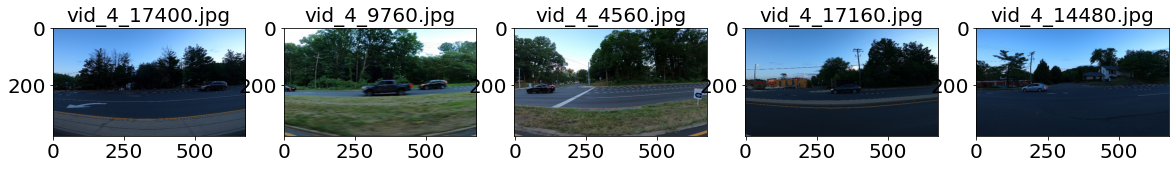

In [11]:
import matplotlib.image as mpimg
%matplotlib inline

plt.figure(figsize=(20,20))
img_folder=abspath_curr + 'data/train/car'
for i in range(5):
    file = np.random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

### Setting up data folder

In [12]:
import pathlib

img_folder=abspath_curr + 'data/train/'

data_dir = pathlib.Path(img_folder)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1001


## Checking image dimensions

In [13]:
import PIL

car = list(data_dir.glob('car/*'))
PIL.Image.open(str(car[0]))

im = PIL.Image.open(str(car[0]))

print(im.size)


(676, 380)


## Generate training and validation datasets

In [14]:
img_height = 676
img_width = 380

data_train = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=None)

Found 1001 files belonging to 2 classes.
Using 801 files for training.


In [15]:
data_valid = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=None)

Found 1001 files belonging to 2 classes.
Using 200 files for validation.


### Training Data Overview

In [16]:
data_train

<ShuffleDataset element_spec=(TensorSpec(shape=(676, 380, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

### Validation Data Overview

In [17]:
data_valid

<ShuffleDataset element_spec=(TensorSpec(shape=(676, 380, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

### Identify classes and labels

In [18]:
class_names = data_train.class_names
print(class_names)

['car', 'no car']


## Resizing the data for pretrained model

In [19]:
# Set the default input size for the pretrained model
global input_size
input_size = [224, 224]

# Resize the training data
data_train = data_train.map(resize)

# Resize the validation data
data_valid = data_valid.map(resize)

### Preprocessing the data using pretrained model

In [20]:
# Set the preprocess_input of the pretrained model
global preprocess_input
preprocess_input = tf.keras.applications.resnet.preprocess_input

In [21]:
# Preprocess the training data using pretrained model
data_train = data_train.map(preprocess_pretrain)

# Preprocess the validation data using pretrained model
data_valid = data_valid.map(preprocess_pretrain)

# Shuffling Dataset, Setting Batch size and Prefetching

In [22]:
# Shuffling the training data
data_train = data_train.shuffle(buffer_size=1000, seed=random_seed)

# Set the batch size - changing from 16 to 32
batch_size = 32

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

In [23]:
data_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Training

### Create directory to save model

In [24]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Build Model Architecture

In [25]:
# Add the pretrained layers
pretrained_model = keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
output = keras.layers.Dense(2, activation='sigmoid')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

model.summary()

94781440/94765736 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

### Freezing the pretrained layers

In [26]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

### Setting callbacks

In [27]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

# Stochastic Gradient Descent (SGD) Optimizer

### Compiling the model - SGD Optimizer

In [28]:
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',    
              metrics=['accuracy'])

### Training, evaluating and saving the best model -SGD

In [29]:
# Train, evaluate and save the best model
history_SGD = model.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
26/26 [==============================] - 165s 6s/step - loss: 0.8534 - accuracy: 0.7154 - val_loss: 1.1567 - val_accuracy: 0.6800 - lr: 0.0100
Epoch 2/5
26/26 [==============================] - 175s 6s/step - loss: 0.4137 - accuracy: 0.8489 - val_loss: 1.0685 - val_accuracy: 0.7100 - lr: 0.0100
Epoch 3/5
26/26 [==============================] - 156s 6s/step - loss: 0.2235 - accuracy: 0.9164 - val_loss: 5.5781 - val_accuracy: 0.3550 - lr: 0.0100
Epoch 4/5
26/26 [==============================] - 159s 6s/step - loss: 1.1284 - accuracy: 0.7341 - val_loss: 0.1887 - val_accuracy: 0.9250 - lr: 1.0000e-03
Epoch 5/5
26/26 [==============================] - 158s 6s/step - loss: 0.2311 - accuracy: 0.8976 - val_loss: 0.1554 - val_accuracy: 0.9550 - lr: 1.0000e-03


# Plotting the learning curve
### Creating the directory for the figure

In [30]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

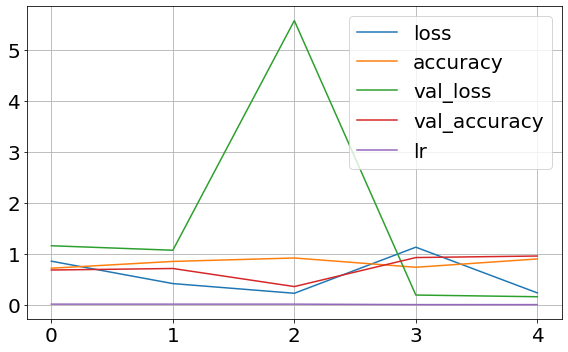

In [31]:
import pandas as pd

# Create a figure
pd.DataFrame(history_SGD.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/SGD_learning_curve_before_unfreezing.pdf')
plt.show()

## Unfreezing the pretrained layers

In [35]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

## Compiling the model -SGD

In [36]:
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [37]:
# Train, evaluate and save the best model
history_SGD = model.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
26/26 [==============================] - 565s 21s/step - loss: 0.3193 - accuracy: 0.8727 - val_loss: 0.1632 - val_accuracy: 0.9350 - lr: 0.0010
Epoch 2/5
26/26 [==============================] - 561s 21s/step - loss: 0.2059 - accuracy: 0.9413 - val_loss: 0.1316 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 3/5
26/26 [==============================] - 561s 21s/step - loss: 0.1535 - accuracy: 0.9551 - val_loss: 0.1103 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 4/5
26/26 [==============================] - 557s 21s/step - loss: 0.1246 - accuracy: 0.9675 - val_loss: 0.1497 - val_accuracy: 0.9450 - lr: 0.0010
Epoch 5/5
26/26 [==============================] - 572s 22s/step - loss: 0.1047 - accuracy: 0.9875 - val_loss: 0.1470 - val_accuracy: 0.9500 - lr: 1.0000e-04


### Plotting the learning curve

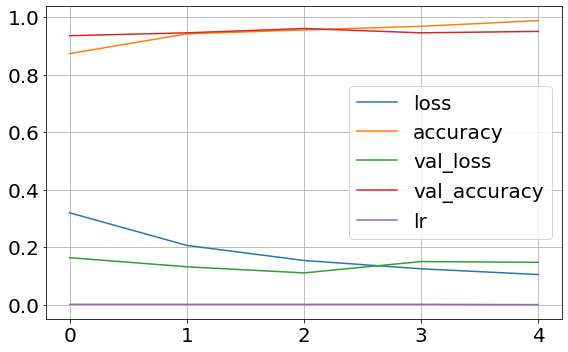

In [38]:
# Create a figure
pd.DataFrame(history_SGD.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/SGD_learning_curve_after_unfreezing.pdf')
plt.show()

# ADAM Optimizer

### Compiling the model - Adam Optimizer

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',    
              metrics=['accuracy'])

### Training, evaluating and saving the best model

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=7,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/7
26/26 [==============================] - 170s 6s/step - loss: 0.8973 - accuracy: 0.8127 - val_loss: 0.1838 - val_accuracy: 0.9350 - lr: 0.0100
Epoch 2/7
26/26 [==============================] - 162s 6s/step - loss: 0.2608 - accuracy: 0.9189 - val_loss: 0.1890 - val_accuracy: 0.9250 - lr: 0.0100
Epoch 3/7
26/26 [==============================] - 158s 6s/step - loss: 0.1039 - accuracy: 0.9625 - val_loss: 0.1669 - val_accuracy: 0.9300 - lr: 1.0000e-03
Epoch 4/7
26/26 [==============================] - 161s 6s/step - loss: 0.1100 - accuracy: 0.9675 - val_loss: 0.1963 - val_accuracy: 0.9250 - lr: 1.0000e-03
Epoch 5/7
26/26 [==============================] - 160s 6s/step - loss: 0.0863 - accuracy: 0.9738 - val_loss: 0.1656 - val_accuracy: 0.9300 - lr: 1.0000e-04
Epoch 6/7
26/26 [==============================] - 160s 6s/step - loss: 0.0849 - accuracy: 0.9713 - val_loss: 0.1649 - val_accuracy: 0.9300 - lr: 1.0000e-04
Epoch 7/7
26/26 [==============================] - 162s 6s/step - 

# Plotting the learning curve
### Creating the directory for the figure

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

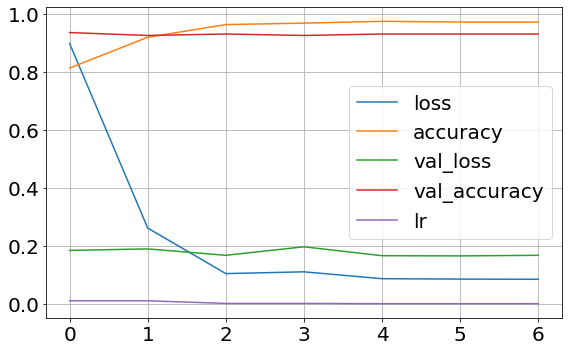

In [ ]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing.pdf')
plt.show()

## Unfreezing the pretrained layers

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

## Compiling the model

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/10
26/26 [==============================] - 584s 22s/step - loss: 0.6645 - accuracy: 0.8889 - val_loss: 440807.5312 - val_accuracy: 0.3550 - lr: 0.0010
Epoch 2/10
26/26 [==============================] - 578s 22s/step - loss: 0.2352 - accuracy: 0.9426 - val_loss: 28352.7383 - val_accuracy: 0.6450 - lr: 0.0010
Epoch 3/10
26/26 [==============================] - 577s 22s/step - loss: 0.0864 - accuracy: 0.9725 - val_loss: 582.9331 - val_accuracy: 0.6450 - lr: 0.0010
Epoch 4/10
26/26 [==============================] - 578s 22s/step - loss: 0.1604 - accuracy: 0.9763 - val_loss: 14732.8984 - val_accuracy: 0.3550 - lr: 0.0010
Epoch 5/10
26/26 [==============================] - 575s 22s/step - loss: 0.0668 - accuracy: 0.9813 - val_loss: 438.4748 - val_accuracy: 0.3850 - lr: 1.0000e-04
Epoch 6/10
26/26 [==============================] - 576s 22s/step - loss: 0.0837 - accuracy: 0.9875 - val_loss: 50.8122 - val_accuracy: 0.6200 - lr: 1.0000e-04
Epoch 7/10
26/26 [==========================

### Plotting the learning curve

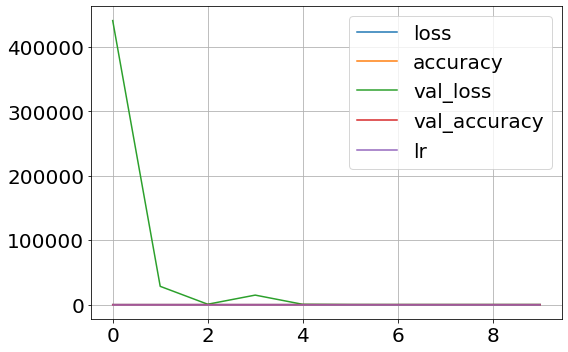

In [ ]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing.pdf')
plt.show()

# Testing - Using SGD Optimizer

In [39]:
# Load the saved model
model.load_weights(filepath=abspath_curr + '/result/model/model.h5')

In [49]:
import PIL

car=[]

img_folder=abspath_curr + 'data/test/'

data_dir = pathlib.Path(img_folder)

car = list(data_dir.glob('*.jpg'))

for i in range(len(list(data_dir.glob('*.jpg')))):

  im = PIL.Image.open(str(car[i]))

  # plt.imshow(im)

  img_data=np.resize(im,(224,224,3))

  tahmin=model.predict(img_data.reshape(1,224,224,3))

  if tahmin[0][1] > 0.5:
    car.append(tahmin[0][1])
  else:
    # car.append(tahmin[0][0])
    car.append(0.0)


In [50]:
print("Accuracy: ", np.round(np.mean(car[175:]) * 100,2), "%")

Accuracy:  86.57 %


# Result Verification

[0.02012298 0.87350094]


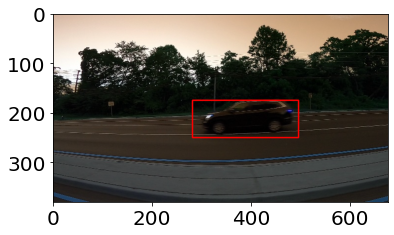

In [72]:
import cv2

im = PIL.Image.open(abspath_curr + 'data/test/vid_5_27620.jpg')
img_data=np.resize(im,(224,224,3))
tahmin=model.predict(img_data.reshape(1,224,224,3))
print(tahmin[0])

img=cv2.imread(abspath_curr + 'data/test/vid_5_27620.jpg')

cv2.rectangle(img,(281, 175),(495,250),(255, 0, 0),2)
plt.figure()

plt.imshow(img);